# **Sentiment Analyst Bitcoin Tweet's**

Objectives:
- Predict the Sentiment of people's tweets against bitcoin

    
Data set: this dataset was obtained from Kaggle of bitcoin tweets collected from 2016 to 2019 (3 years). The number of original columns is approximately 3 million rows.

# **IMPORT PUSTAKA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import re

from langdetect import detect

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Flatten, Input

from sklearn.metrics import confusion_matrix , classification_report

import joblib

# **DATA LOADING**

## Data Sampling

In [13]:
# df = pd.read_csv('mbsa.csv')
# df

,Date,text,Sentiment
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,Positive
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive
2,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,Positive
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,Positive
...,...,...,...
19344043,2019-11-23,Happy #FibonacciDay \n\nA while back I created...,Positive
19344044,2019-11-23,Bitcoin Suisse Certificates :) https://t.co/nd...,Positive
19344045,2019-11-23,Register now for the early access of the Codug...,Positive
19344046,2019-11-23,@btc \n@btc \nDo you know that BTC Baskets isn...,Positive


In [3]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19344048 entries, 0 to 19344047
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Date       object
 1   text       object
 2   Sentiment  object
dtypes: object(3)
memory usage: 442.8+ MB


In [14]:
# tweets = df.query( "Date >='2017-01-01' & Date <='2018-31-12'")
# tweets

,Date,text,Sentiment
644544,2018-09-11,I didnt tether at $7300 #iamspartacus\n$btc $e...,Negative
644545,2018-09-11,2018-09-11 21:00:03 UTC\n\nBTC: $6261.32\nBCH:...,Negative
644546,2018-09-11,Top 5 #cryptocurrencies \n Alert Time: 2018-09...,Negative
644547,2018-09-11,Top performers (as per coinmarketcap) over las...,Negative
644548,2018-09-11,#BTCUSD Market #1H timeframe on September 11 ...,Negative
...,...,...,...
6019508,2017-08-21,who the fuck called it a Bitcoin enthusiast fo...,Negative
6019509,2017-08-21,ブログ更新しました〜 マイナーワールドのご質問をしていただく方へ。 https://t.co...,Negative
6019510,2017-08-21,(Teen) faces 15 years in prison after used Twi...,Negative
6019511,2017-08-21,"Why I'm skeptical of any attempt to build ""Bit...",Negative


I took tweets data in 2017 - 2018, because according to information outside this dataset, that year was the year where bitcoin experienced price fluctuations.

In [5]:
# tweets.isnull().sum()

Date         0
text         0
Sentiment    2
dtype: int64

the 2017 - 2018 dataset has only 2 missing values in the Sentiment column, I will probably delete that later so that there are no missing values

In [6]:
# tweets.dropna(inplace=True)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:
# tweets.isnull().sum()

Date         0
text         0
Sentiment    0
dtype: int64

In [15]:
data = tweets.sample(100000, random_state=16)
data.reset_index(drop=True, inplace=True)
data

,Date,text,Sentiment
0,2017-08-13,Bitcoin price breaks $4000. Here's why - Quart...,Positive
1,2018-08-03,@India_Bitcoin,Negative
2,2018-08-01,Jim Rogers: “La burbuja del bitcóin se parece...,Negative
3,2018-11-28,Other Services includes \n• Buying and selling...,Positive
4,2018-08-02,トンカツやったぜ！スクショした,Negative
...,...,...,...
99995,2018-03-24,2018/03/25 05:00\n#BTC 937481円\n#ETH 56467.8円\...,Negative
99996,2017-10-11,A Quick 'How To' Guide On The Basics Of Buying...,Positive
99997,2018-08-03,@India_Bitcoin,Negative
99998,2018-08-03,@Bitcoin_Post,Negative


Here I take random sampling from the 2017-2018 timeframe of 10000 columns. which will be saved to a new csv to ease the work of running this project.

In [16]:
#saving sampling to csv

# data.to_csv('sampling.csv')

## Data Loading With Sampling Data

In [17]:
#load sampling to csv

data = pd.read_csv('sampling.csv')

In [19]:
#delete Unamed columns

data = data.drop(columns='Unnamed: 0')

In [20]:
data

,Date,text,Sentiment
0,2017-08-13,Bitcoin price breaks $4000. Here's why - Quart...,Positive
1,2018-08-03,@India_Bitcoin,Negative
2,2018-08-01,Jim Rogers: “La burbuja del bitcóin se parece...,Negative
3,2018-11-28,Other Services includes \n• Buying and selling...,Positive
4,2018-08-02,トンカツやったぜ！スクショした,Negative
...,...,...,...
99995,2018-03-24,2018/03/25 05:00\n#BTC 937481円\n#ETH 56467.8円\...,Negative
99996,2017-10-11,A Quick 'How To' Guide On The Basics Of Buying...,Positive
99997,2018-08-03,@India_Bitcoin,Negative
99998,2018-08-03,@Bitcoin_Post,Negative


In [31]:
#Check missing values
data.isnull().sum()

Date         0
text         0
Sentiment    0
language     0
dtype: int64

There are no missing values in this dataset.

# **EXPLORATION DATA ANALYSIS**

## Sentiment analysis

In [21]:
data.Sentiment.value_counts()

Negative    66151
Positive    33829
Neutral        20
Name: Sentiment, dtype: int64

In [22]:
data.Sentiment.unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

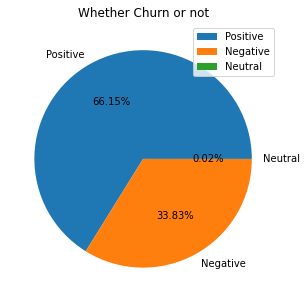

In [23]:
fig,ax = plt.subplots(figsize=(10,5))
plt.pie(data.Sentiment.value_counts(), labels=data.Sentiment.value_counts().keys(), autopct='%.2f%%')
ax.set_title('Whether Churn or not')
plt.legend()

It is known that 2017 - 2018 was a year where the price of bitcoin was up and down. and after we look at the sentiment, 33.80% positive sentiment, 66.19% negative sentiment and only 0.01% neutral sentiment which proves that when the bitcoin price is experiencing ups and downs, the sentiment of people's tweets is also dominated by positive sentiment and negative sentiment.


People will tweet when there is a bitcoin price movement, and the tweet sentiment will follow what happens. when the price goes up the tweet will be positive and when the price goes down the tweet will be negative. neutral means that there is no significant price movement.

I think the tweets on twitter and the price of bitcoin can be said to influence each other. because twitter is one of the biggest social media a lot of users. Bitcoin price movements are influenced by the volume of buying and selling.

## Language of Text

Here will be checking the language that is often used by Twitter users. Before checking, there will be a language detection first.

Language detection is carried out to remove undetected languages and to find out what language is used.

In [24]:
#check syntax
detect(data.at[0,'text'])

'en'

In [25]:
#drop invalid language
invalid_text = []

for i in data.index:
  try:
    a = detect(data.at[i,'text'])
  except:
    invalid_text.append(i)
    
data = data.drop(index =invalid_text)

In [26]:
data.shape

(99917, 3)

After being dropped, it turns out that the shape has changed from 100,000 rows to 99,917 rows, meaning there are 3 columns that are not detected

In [27]:
#vreate new columns of language
data['language'] = data['text'].map(lambda desc: detect(desc))
data.head()

,Date,text,Sentiment,language
0,2017-08-13,Bitcoin price breaks $4000. Here's why - Quart...,Positive,en
1,2018-08-03,@India_Bitcoin,Negative,en
2,2018-08-01,Jim Rogers: “La burbuja del bitcóin se parece...,Negative,es
3,2018-11-28,Other Services includes \n• Buying and selling...,Positive,en
4,2018-08-02,トンカツやったぜ！スクショした,Negative,ja


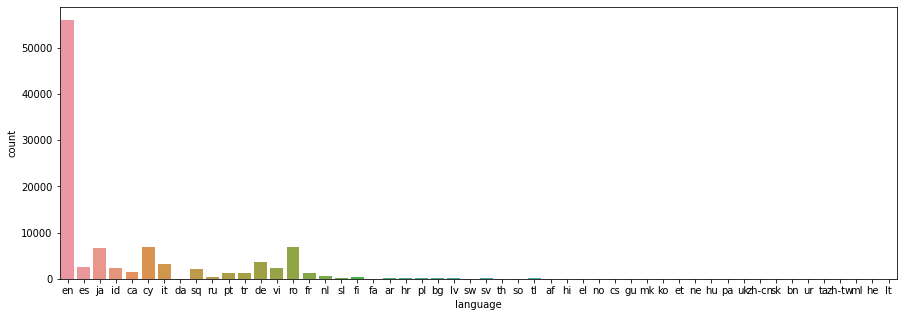

In [28]:
fig,ax = plt.subplots(figsize=(15,5))

sns.countplot(x="language", data=data, ax=ax);

The language that is often used is English. English is indeed an international language so it is very natural that English is the language that is often used by people to tweet something. Therefore I will query using English only.

In [32]:
#Query for english only
dftwt = data.query( "language =='en'")
dftwt

,Date,text,Sentiment,language
0,2017-08-13,Bitcoin price breaks $4000. Here's why - Quart...,Positive,en
1,2018-08-03,@India_Bitcoin,Negative,en
3,2018-11-28,Other Services includes \n• Buying and selling...,Positive,en
5,2017-12-08,When changing your #password is not an much of...,Negative,en
7,2017-12-08,Can you collect Bitcoin in a lottery mood?\n\n...,Negative,en
...,...,...,...,...
99994,2018-11-03,Current price: $0.022563 \nNode count: 1074 \n...,Negative,en
99995,2018-03-24,2018/03/25 05:00\n#BTC 937481円\n#ETH 56467.8円\...,Negative,en
99996,2017-10-11,A Quick 'How To' Guide On The Basics Of Buying...,Positive,en
99997,2018-08-03,@India_Bitcoin,Negative,en


## Sentiment Analysis (English Only)

In [33]:
dftwt.Sentiment.value_counts()

Negative    31608
Positive    24375
Neutral        15
Name: Sentiment, dtype: int64

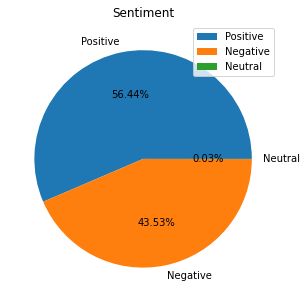

In [35]:
fig,ax = plt.subplots(figsize=(10,5))
plt.pie(dftwt.Sentiment.value_counts(), labels=dftwt.Sentiment.value_counts().keys(), autopct='%.2f%%')
ax.set_title('Sentiment')
plt.legend()

Sentiment in English shows 56.44% Negative, 43.53% Positive and only 0.03% is neutral.

## Tweet lenght

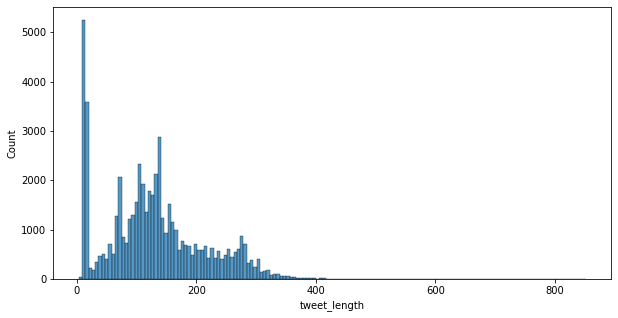

In [43]:
dftwt["tweet_length"] = dftwt["text"].apply(len)
fig,ax = plt.subplots(figsize=(10,5))
sns.histplot(data=dftwt, x="tweet_length");

If we see from the distribution of the number of characters. there's a spike of over 5000 under 100 characters. this shows that many people use fewer characters to tweet about bitcoin.

seen after the spike. it can be seen that the graph shows an increase towards 200 character usage before decreasing to reach 200. it can be seen that the use of 200 characters is still rarely used by people to tweet.

In [44]:
#mean
dftwt.tweet_length.mean()

129.1499696417729

The average number of characters used to tweet is 129 characters.

the average person uses 129 characters to tweet something that has positive, negative and neutral sentiments

In [45]:
#min and max
min(dftwt["tweet_length"]), max(dftwt["tweet_length"])

(3, 852)

It can be seen that the maximum number of characters used is 852 and the minimum is 3. The maximum number of characters in Twitter is 240, it can be assumed that the number of characters above 240 is a combination of several tweets (threads) made by the user and combined in this dataset.

## Number of Words

C:\Users\HP\AppData\Local\Temp\ipykernel_24968\3947329717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwt["num_words"] = dftwt["text"].apply(count_words)


mean of num word: 16.099092824743742
min of num words: 1
max of num word: 73


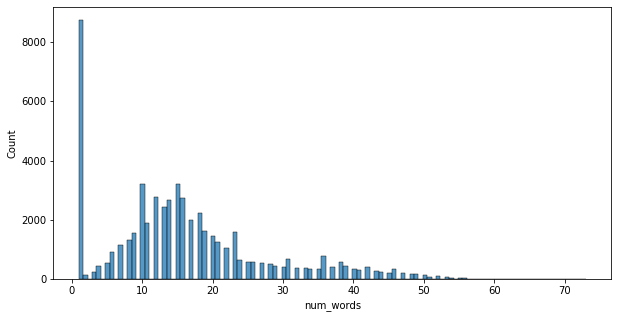

In [49]:
def count_words(x):
    return len(x.split())

dftwt["num_words"] = dftwt["text"].apply(count_words)
fig,ax = plt.subplots(figsize=(10,5))
sns.histplot(data=dftwt, x="num_words");
print('mean of num word:', dftwt.num_words.mean())
print('min of num words:',min(dftwt["num_words"]))
print('max of num word:',max(dftwt["num_words"]) )

the average word used is 16 words to tweet, the minimum is 1 and the maximum is 73. to tweet using 73 in one tweet, this means that there is something discussed, not just an upate. whenever possible in this dataset there is 1 thread being merged. and to tweet 1 word it is very little or you could say it's just for updating, for example 'bitcoin' and then tweeting it.

most people tweet using 16 words about bitcoin which is where the tweet is detected can be sentimental towards bitcoin.

the more characters used the less people use that number of characters. this adds to my belief that the more characters and the more words it is a thread that is done by the user to make a short discussion about bitcoin, because creating a thread is not something that is commonly done by users on twitter.

# **DATA PREPROCESSING**

In this section, it will be done first to clean up the existing tweets and then proceed with the distribution of the dataset and the last is preprocessing.

## Data Cleaning

In [77]:
#function for cleaning text

def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)


def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

def cleaner(df):
    dftwt['clean_text'] = dftwt['text'].apply(clean_text)
    return df


In [78]:
datatwt = cleaner(dftwt)
datatwt

C:\Users\HP\AppData\Local\Temp\ipykernel_24968\1649341237.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftwt['clean_text'] = dftwt['text'].apply(clean_text)


,Date,text,Sentiment,language,tweet_length,num_words,clean_text
0,2017-08-13,Bitcoin price breaks $4000. Here's why - Quart...,Positive,en,70,9,bitcoin price breaks here is why quartz
1,2018-08-03,@India_Bitcoin,Negative,en,14,1,indiabitcoin
3,2018-11-28,Other Services includes \n• Buying and selling...,Positive,en,214,35,other services includes buying and selling of ...
5,2017-12-08,When changing your #password is not an much of...,Negative,en,309,39,when changing your password is not an much of ...
7,2017-12-08,Can you collect Bitcoin in a lottery mood?\n\n...,Negative,en,90,11,can you collect bitcoin in a lottery mood btc ...
...,...,...,...,...,...,...,...
99994,2018-11-03,Current price: $0.022563 \nNode count: 1074 \n...,Negative,en,126,18,current price node count total accounts co...
99995,2018-03-24,2018/03/25 05:00\n#BTC 937481円\n#ETH 56467.8円\...,Negative,en,160,23,btc eth etc bch xrp xem lsk mona ...
99996,2017-10-11,A Quick 'How To' Guide On The Basics Of Buying...,Positive,en,164,23,a quick how to guide on the basics of buying a...
99997,2018-08-03,@India_Bitcoin,Negative,en,14,1,indiabitcoin


Previously, it was known that the number of neutral sentiments was only 0.03%, so from there I chose to delete the data label because the number was too small.

In [79]:
#deleting Sentiment Neutral by Index
datatwt = datatwt.drop(datatwt[datatwt.Sentiment == 'Neutral'].index)

In [80]:
datatwt

,Date,text,Sentiment,language,tweet_length,num_words,clean_text
0,2017-08-13,Bitcoin price breaks $4000. Here's why - Quart...,Positive,en,70,9,bitcoin price breaks here is why quartz
1,2018-08-03,@India_Bitcoin,Negative,en,14,1,indiabitcoin
3,2018-11-28,Other Services includes \n• Buying and selling...,Positive,en,214,35,other services includes buying and selling of ...
5,2017-12-08,When changing your #password is not an much of...,Negative,en,309,39,when changing your password is not an much of ...
7,2017-12-08,Can you collect Bitcoin in a lottery mood?\n\n...,Negative,en,90,11,can you collect bitcoin in a lottery mood btc ...
...,...,...,...,...,...,...,...
99994,2018-11-03,Current price: $0.022563 \nNode count: 1074 \n...,Negative,en,126,18,current price node count total accounts co...
99995,2018-03-24,2018/03/25 05:00\n#BTC 937481円\n#ETH 56467.8円\...,Negative,en,160,23,btc eth etc bch xrp xem lsk mona ...
99996,2017-10-11,A Quick 'How To' Guide On The Basics Of Buying...,Positive,en,164,23,a quick how to guide on the basics of buying a...
99997,2018-08-03,@India_Bitcoin,Negative,en,14,1,indiabitcoin


## Splitting

The tweet that will be used is the tweet that has been cleaned (clean_text) and the label that will be predicted is the Sentiment column.

In [81]:
#splitting X and y
X = datatwt['clean_text']
y = datatwt['Sentiment']

In [82]:
#check X
X

0                 bitcoin price breaks  here is why quartz
1                                             indiabitcoin
3        other services includes buying and selling of ...
5        when changing your password is not an much of ...
7        can you collect bitcoin in a lottery mood btc ...
                               ...                        
99994    current price   node count  total accounts  co...
99995    btc  eth   etc   bch   xrp  xem   lsk   mona  ...
99996    a quick how to guide on the basics of buying a...
99997                                         indiabitcoin
99998                                          bitcoinpost
Name: clean_text, Length: 55983, dtype: object

In [83]:
#check y
y

0        Positive
1        Negative
3        Positive
5        Negative
7        Negative
           ...   
99994    Negative
99995    Negative
99996    Positive
99997    Negative
99998    Negative
Name: Sentiment, Length: 55983, dtype: object

In [84]:
y.unique()

array(['Positive', 'Negative'], dtype=object)

In [85]:
# Split train and test
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Split train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train , test_size=0.1, random_state=16)

In [86]:
# Melihat shape dari masing - masing set

print('Train Shape:')
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print(' ')
print('Test Shape:')
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)
print(' ')
print('Val Shape:')
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)


Train Shape:
X_train shape (40307,)
y_train shape (40307,)
 
Test Shape:
X_test shape (11197,)
y_test shape (11197,)
 
Val Shape:
X_val shape (4479,)
y_val shape (4479,)


In [87]:
#copy set

X_train_copied = X_train.copy()
X_val_copied = X_val.copy()
X_test_copied= X_test.copy()

In [88]:
#copy set

y_train_c = y_train.copy()
y_test_c = y_test.copy()
y_val_c = y_val.copy()

I'll do some preprocessing using the data set to see what the difference is.

In [89]:
train = pd.DataFrame({'text': X_train_copied})
train

,text
72288,live profit buy b vircurex sell bi...
6068,gmt spindle price spd btc yobit hitbtc liv...
37678,swift reveals future global payment tech block...
89850,i am holding till pennies do or die dgaf attit...
81612,bitcoinpost
...,...
31046,india has effectively banned cryptocurrencies ...
95582,imt airdrop and whitelisting get imt token wo...
63197,may utc bitcoin btc pic twitter ...
7151,monacoin mona btc


## Tokenization

Tokenization is done to separate each word in a sentence.

Input: I eat tomatoes

Output : Me, eat, tomatoes

In [90]:
# function for tokenization
from nltk.tokenize import word_tokenize
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

#apply fuction to columns

train['text_tokenied'] = train['text'].apply(lambda row: tokenization(row))

In [91]:
train

,text,text_tokenied
72288,live profit buy b vircurex sell bi...,"[live, profit, buy, b, vircurex, sell, bitkona..."
6068,gmt spindle price spd btc yobit hitbtc liv...,"[gmt, spindle, price, spd, btc, yobit, hitbtc,..."
37678,swift reveals future global payment tech block...,"[swift, reveals, future, global, payment, tech..."
89850,i am holding till pennies do or die dgaf attit...,"[i, am, holding, till, pennies, do, or, die, d..."
81612,bitcoinpost,[bitcoinpost]
...,...,...
31046,india has effectively banned cryptocurrencies ...,"[india, has, effectively, banned, cryptocurren..."
95582,imt airdrop and whitelisting get imt token wo...,"[imt, airdrop, and, whitelisting, get, imt, to..."
63197,may utc bitcoin btc pic twitter ...,"[may, utc, bitcoin, btc, pic, twitter, com, ft..."
7151,monacoin mona btc,"[monacoin, mona, btc]"


## Stopwords Removal

Stopwords themselves are words that are very commonly used. In this section, the most frequently used words will be removed.

In [93]:
#contoh stopwords yang terdeteksi
stopwords = stopwords.words('english')
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Here are examples of frequently used words.

In [94]:
#function stopwords
def remove_stopwords(text):
    output = [i for i in text if i not in stopwords]
    return output

#apply the fuction
train['stopwords'] = train['text_tokenied'].apply(lambda row: remove_stopwords(row))

train

,text,text_tokenied,stopwords
72288,live profit buy b vircurex sell bi...,"[live, profit, buy, b, vircurex, sell, bitkona...","[live, profit, buy, b, vircurex, sell, bitkona..."
6068,gmt spindle price spd btc yobit hitbtc liv...,"[gmt, spindle, price, spd, btc, yobit, hitbtc,...","[gmt, spindle, price, spd, btc, yobit, hitbtc,..."
37678,swift reveals future global payment tech block...,"[swift, reveals, future, global, payment, tech...","[swift, reveals, future, global, payment, tech..."
89850,i am holding till pennies do or die dgaf attit...,"[i, am, holding, till, pennies, do, or, die, d...","[holding, till, pennies, die, dgaf, attitude, ..."
81612,bitcoinpost,[bitcoinpost],[bitcoinpost]
...,...,...,...
31046,india has effectively banned cryptocurrencies ...,"[india, has, effectively, banned, cryptocurren...","[india, effectively, banned, cryptocurrencies,..."
95582,imt airdrop and whitelisting get imt token wo...,"[imt, airdrop, and, whitelisting, get, imt, to...","[imt, airdrop, whitelisting, get, imt, token, ..."
63197,may utc bitcoin btc pic twitter ...,"[may, utc, bitcoin, btc, pic, twitter, com, ft...","[may, utc, bitcoin, btc, pic, twitter, com, ft..."
7151,monacoin mona btc,"[monacoin, mona, btc]","[monacoin, mona, btc]"


## Lemmatization

Lemmanitization can be interpreted as a more advanced preprocessing than stemming where it will equalize a word. Examples of eaten and eat have the same meaning, we want eaten eaten to still be interpreted by the computer, this is where the function of lemmatization is.

In [96]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [97]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [98]:
#defining the object for Lemmatization
word_lemmatizer = WordNetLemmatizer()

#function of lemmatization
def lemmatizer(text):
    lemma = [word_lemmatizer.lemmatize(word) for word in text]
    return lemma

#apply fuction

train['lemma'] = train['stopwords'].apply(lambda row: lemmatizer(row))

train.head()

,text,text_tokenied,stopwords,lemma
72288,live profit buy b vircurex sell bi...,"[live, profit, buy, b, vircurex, sell, bitkona...","[live, profit, buy, b, vircurex, sell, bitkona...","[live, profit, buy, b, vircurex, sell, bitkona..."
6068,gmt spindle price spd btc yobit hitbtc liv...,"[gmt, spindle, price, spd, btc, yobit, hitbtc,...","[gmt, spindle, price, spd, btc, yobit, hitbtc,...","[gmt, spindle, price, spd, btc, yobit, hitbtc,..."
37678,swift reveals future global payment tech block...,"[swift, reveals, future, global, payment, tech...","[swift, reveals, future, global, payment, tech...","[swift, reveals, future, global, payment, tech..."
89850,i am holding till pennies do or die dgaf attit...,"[i, am, holding, till, pennies, do, or, die, d...","[holding, till, pennies, die, dgaf, attitude, ...","[holding, till, penny, die, dgaf, attitude, em..."
81612,bitcoinpost,[bitcoinpost],[bitcoinpost],[bitcoinpost]


## Fuction for apply

In [99]:
#make a function of preprocess
def cleaned(text):
    text = word_tokenize(text)
    text = [i for i in text if i not in stopwords]
    text = [word_lemmatizer.lemmatize(word) for word in text]
    return text

#apply fuction

X_train = X_train.apply(lambda row: cleaned(row))
X_val = X_val.apply(lambda row: cleaned(row))
X_test = X_test.apply(lambda row: cleaned(row))

## Label encoder

Because the label is a string, so I did the encoder label first.

In [100]:
label = LabelEncoder()
label.fit(y_train)

y_train = label.transform(y_train)
y_val = label.transform(y_val)
y_test = label.transform(y_test)


In [101]:
y_train

array([0, 1, 1, ..., 0, 1, 0])

In [191]:
y_train_c

72288    Negative
6068     Positive
37678    Positive
89850    Positive
81612    Negative
           ...   
31046    Negative
95582    Positive
63197    Negative
7151     Positive
79367    Negative
Name: Sentiment, Length: 40307, dtype: object

## Text Vectorization

Text vectorization is a step to convert words into numbers. basically this is done because the computer cannot read words/sentences, the computer can only read numbers.

There are many ways to do text vectorization, what I choose now is to do it manually using the NLTK library.

In [196]:
t = Tokenizer(oov_token='UNK',num_words=10000)
t.fit_on_texts(X_train)

In [197]:
#Turns string into lists of integer indices
X_train_seq = t.texts_to_sequences(X_train)
X_val_seq = t.texts_to_sequences(X_val)
X_test_seq = t.texts_to_sequences(X_test)

In [198]:
# show the vocab
word_index = t.word_index
print('Found %s unique tokens.' % len(word_index))

Found 36030 unique tokens.


if we see there are 36030 words listed in the X_train data. but we only use 10000 only.

In [199]:
# defining max length
tem = 0
for i in range(len(X_train_seq)):
    tem += len(X_train_seq[i])
maxlenght = int(tem/len(X_train_seq))
print(maxlenght)

10


the average number of words that is is 10.

In [200]:

X_train_done = pad_sequences(X_train_seq, maxlen = maxlenght, padding = 'post')
X_val_done = pad_sequences(X_val_seq, maxlen = maxlenght, padding = 'post')
X_test_done = pad_sequences(X_test_seq, maxlen = maxlenght, padding = 'post')

padding is done to fill in the blanks of words, if the length of the word is only 3 and the average is 10, the padding process will do the filling of 3 words to 10 with the number 0


example : [1,3,4,5]

will be : [1,2,3,4,5,0,0,0,0,0]

In [201]:
X_train_done[0]

array([ 141,  121,   20,  178,  784,   68, 2635,    2,    3,    0])

## Pipeline

In [202]:
#pipeline training set
train_set = tf.data.Dataset.from_tensor_slices((X_train_done,y_train)).shuffle(10000).batch(25)

#pipeline validation set
val_set = tf.data.Dataset.from_tensor_slices((X_val_done,y_val)).shuffle(10000).batch(25)

#pipeline test set
test_set = tf.data.Dataset.from_tensor_slices((X_test_done,y_test)).shuffle(10000).batch(25)

# **MODEL DEFINITION**

Here I use the embedding layer and also the LSTM layer.

In [203]:
model = Sequential([
                    Embedding(10000, 128, input_length=maxlenght),
                    LSTM(200, return_sequences=True),
                    LSTM(100),
                    Dense(1, activation='sigmoid')
])

In [204]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10, 128)           1280000   
                                                                 
 lstm_19 (LSTM)              (None, 10, 200)           263200    
                                                                 
 lstm_20 (LSTM)              (None, 100)               120400    
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,663,701
Trainable params: 1,663,701
Non-trainable params: 0
_________________________________________________________________


I'm trying to use the embedding dimensions of 128 and the first lstm layer is 200 larger than the embedding dimensions. the screen I use is 2 layer LSTM. with a total of 511,701 parameters and all of them can be train.

# **MODEL TRAINING**

In [205]:
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy']
)

# **MODEL EVALUATION**

In [206]:
comparison_model = pd.DataFrame(columns=[
    'Model',
    'accuracy'
])

In [207]:
train = model.fit(train_set,epochs=10,validation_data=(val_set),verbose = 0)

In [208]:
metrics =pd.DataFrame(train.history) #history kedua untuk mengakses history
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.559214,0.638624,0.538815,0.667336
1,0.498224,0.710522,0.549631,0.667783
2,0.436607,0.753889,0.618629,0.657736
3,0.381582,0.787407,0.703700,0.662425
4,0.341320,0.810554,0.750797,0.655950


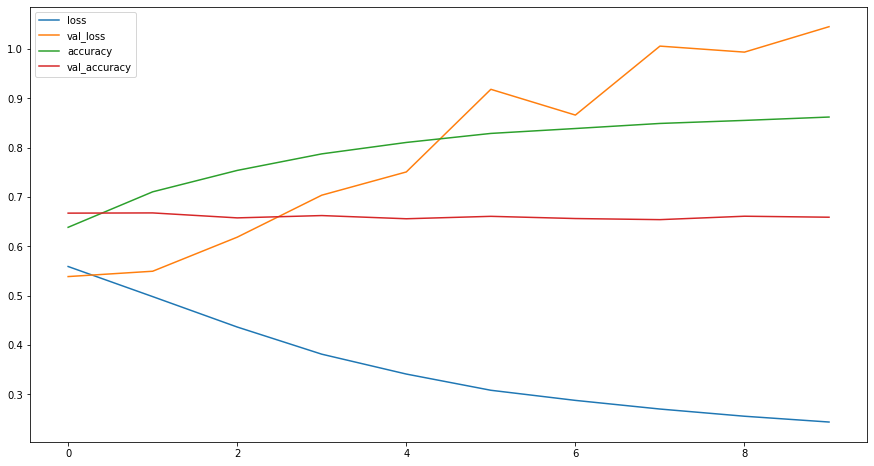

In [209]:
metrics[['loss','val_loss','accuracy','val_accuracy']].plot(figsize=(15,8));

Judging from the graph, this model shows quite an overfitting model because the loss (train and val) graph and the accurasy (train and val) graph, the more epchs passed, the farther away from each graph is. 

# **MODEL EVALUATION**

In [210]:
y_pred = model.predict(test_set)
y_pred = np.where(y_pred < 0.5, 0 , 1).squeeze()

print(classification_report(y_test, y_pred))

comparison_model.loc[0] = ['base model',0.51]

              precision    recall  f1-score   support

           0       0.56      0.50      0.53      6300
           1       0.43      0.49      0.46      4897

    accuracy                           0.49     11197
   macro avg       0.49      0.49      0.49     11197
weighted avg       0.50      0.49      0.50     11197



After making predictions using this first model. the accuracy only touches 0.49 or 49%, this is still far from good. this model can only predict the correct 49%.

# **MODEL IMPROVEMENT**

## Improvement 1

The first improvement model that I did was to use the same layer, except that I replaced the neural in the LSTM layer. which was originally 200 to 64 and 100 to 32.

In [211]:
model_imp1 = Sequential([
                    Embedding(10000, 128, input_length=maxlenght, embeddings_initializer="uniform"),
                    LSTM(64, return_sequences=True),
                    LSTM(32),
                    Dense(1, activation='sigmoid')
])

In [212]:
model_imp1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy']
)

In [213]:
train_1 = model_imp1.fit(train_set,epochs=10,validation_data=(val_set),verbose = 0)

In [214]:
metrics1 =pd.DataFrame(train_1.history) #history kedua untuk mengakses history
metrics1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.557724,0.638202,0.541649,0.663094
1,0.495196,0.712085,0.540224,0.670239
2,0.431611,0.753542,0.577033,0.671355
3,0.377838,0.788821,0.635255,0.670909
4,0.338076,0.810877,0.736076,0.668006


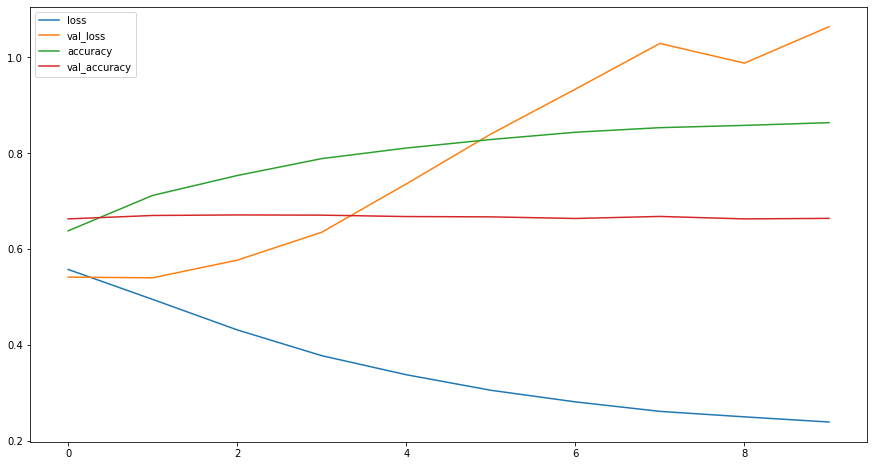

In [215]:
metrics1[['loss','val_loss','accuracy','val_accuracy']].plot(figsize=(15,8));

The model is still overfitting, it turns out that just replacing the neurons is not enough to change the model results. which can also be noted that with this model the maximum accuray only touches around 0.7 while with the previous model it can touch 0.8.

In [216]:
y_pred_imp1 = model_imp1.predict(test_set)
y_pred_imp1 = np.where(y_pred_imp1 < 0.5, 0 , 1).squeeze()
print(classification_report(y_test, y_pred_imp1))

comparison_model.loc[1] = ['improvement 1',0.51]

              precision    recall  f1-score   support

           0       0.56      0.54      0.55      6300
           1       0.44      0.47      0.45      4897

    accuracy                           0.51     11197
   macro avg       0.50      0.50      0.50     11197
weighted avg       0.51      0.51      0.51     11197



accuracy when making predictions does not change, it remains at 0.51. So with this first improvement, the results are still the same as the base model.

## Improvement 2

This second improvement I added a dropout layer on LSTM layer 64 which means it will only use 0.5 of the total neurons. and replace embeddings_initializer which was originally uniform to normal glorot.

In [245]:
model_imp2 = Sequential([
                    Embedding(10000, 128, input_length=maxlenght, embeddings_initializer="GlorotNormal"),
                    LSTM(64, return_sequences=True),
                    Dropout(0.5),
                    LSTM(32),
                    Dense(1, activation='sigmoid')
])

In [246]:
model_imp2.compile(loss='binary_crossentropy',
                optimizer='adamax',
                metrics=['accuracy']
)

In [247]:
train_2 = model_imp2.fit(train_set,epochs=4,validation_data=(val_set),verbose = 0)

In [248]:
metrics2 =pd.DataFrame(train_2.history) #history kedua untuk mengakses history
metrics2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.572007,0.623986,0.560095,0.635856
1,0.542420,0.668221,0.550810,0.655057
2,0.522082,0.690600,0.544300,0.652378
3,0.506102,0.705188,0.544100,0.657066


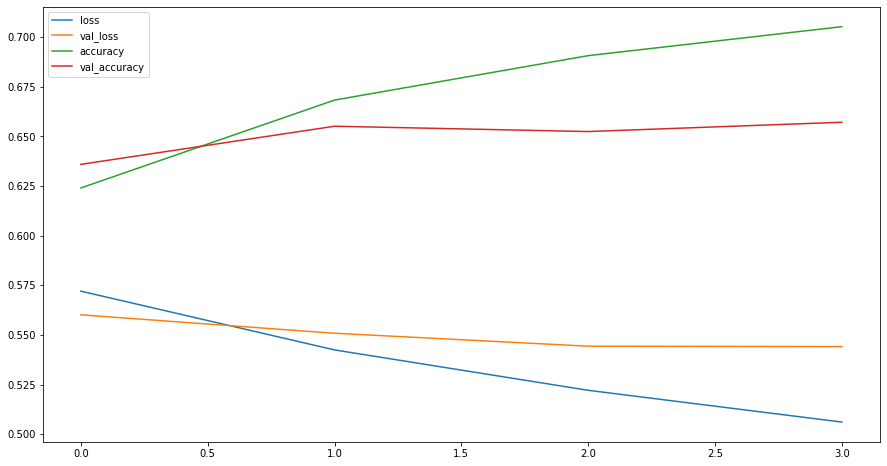

In [249]:
metrics2[['loss','val_loss','accuracy','val_accuracy']].plot(figsize=(15,8));

In this model, it is sufficient to make the graphs not too far apart in the same epoch, namely 10. Thus, the 2nd improvement model is sufficient to handle the overfitting model. Overall an unsatisfactory model, it is still an overfitting model.

In [250]:
y_pred_imp2 = model_imp2.predict(test_set)
y_pred_imp2 = np.where(y_pred_imp2 < 0.5, 0 , 1).squeeze()
print(classification_report(y_test, y_pred_imp2))

comparison_model.loc[2] = ['improvement 2',0.51]

              precision    recall  f1-score   support

           0       0.57      0.50      0.53      6300
           1       0.44      0.51      0.48      4897

    accuracy                           0.51     11197
   macro avg       0.51      0.51      0.51     11197
weighted avg       0.52      0.51      0.51     11197



If we look when predicting. the overfitting is indeed handled but the accuray here is lower than the previous 2 models, only 51%.

## Model Improvement 3

Di model improvement ke 3 ini saya menggabungkan beberapa improvement yang sudah dipakai, dan juga mengurangi epoch mejadi 4 dari 10 akrena sama melihat dari 3 grafik diatas dimana menjadi titik berpencarnya grafik(overfitting)

In [223]:
model_imp3 = Sequential([
                    Embedding(10000, 128, input_length=maxlenght,embeddings_initializer="uniform"),
                    LSTM(64, return_sequences=True),
                    Dropout(0.5),
                    LSTM(32),
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')
])

In [224]:
model_imp3.compile(loss='binary_crossentropy',
                optimizer='adamax',
                metrics=['accuracy']
)

In [225]:
train_3 = model_imp3.fit(train_set,epochs=4,validation_data=(val_set),verbose = 0)

In [226]:
metrics3 =pd.DataFrame(train_3.history) #history kedua untuk mengakses history
metrics2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.571450,0.623812,0.559084,0.637642
1,0.542481,0.669015,0.550896,0.640768
2,0.522780,0.689409,0.547502,0.653494
3,0.504542,0.702806,0.553929,0.659299
4,0.488323,0.716228,0.553066,0.660192


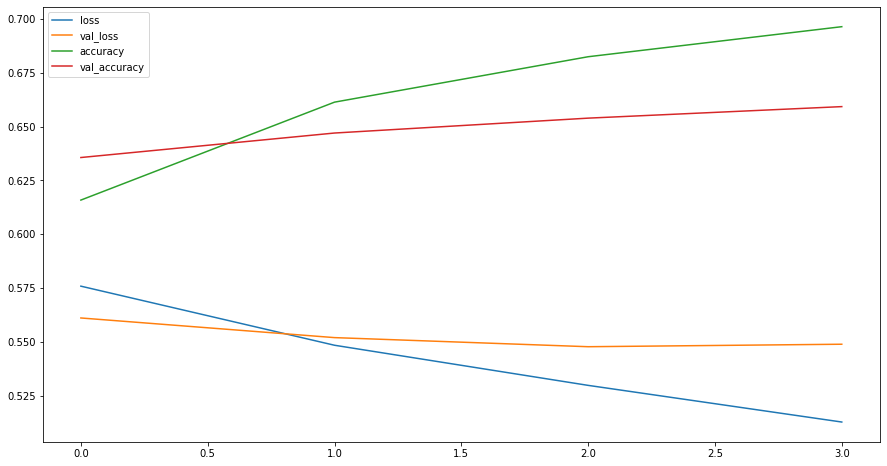

In [227]:
metrics3[['loss','val_loss','accuracy','val_accuracy']].plot(figsize=(15,8));

As can be seen from the graph above. oberfitting has been resolved even though the maximum accuray remains at 0.66. if we look at the end of the epochs the direction of the graph begins to scatter. so epochs 4 is in my opinion the best epochs for now.

In [237]:
y_pred_imp3 = model_imp3.predict(test_set)
y_pred_imp3 = np.where(y_pred_imp3 < 0.5, 0 , 1).squeeze()
print(classification_report(y_test, y_pred_imp3))

comparison_model.loc[3] = ['improvement 3',0.51]

              precision    recall  f1-score   support

           0       0.56      0.60      0.58      6300
           1       0.44      0.40      0.42      4897

    accuracy                           0.51     11197
   macro avg       0.50      0.50      0.50     11197
weighted avg       0.51      0.51      0.51     11197



The predictive value of the test set also increased to 51%, by making this last improvement it can reduce the overfitting of the model

# **MODEL COMPARISSON**

In [238]:
comparison_model

,Model,accuracy
0,base model,0.51
1,improvement 1,0.51
2,improvement 2,0.51
3,improvement 3,0.51


the improvement models both have 51% accuracy in the test set, this can still be improved in many ways, one of which is using pretrained models that are already available, such as Word2Vec, GloVe, BERT and many more.

In [230]:
#confusion matrix
cf_base =  confusion_matrix(y_test,y_pred)
cf_imp1 =  confusion_matrix(y_test,y_pred_imp1)
cf_imp2 =  confusion_matrix(y_test,y_pred_imp2)
cf_imp3 =  confusion_matrix(y_test,y_pred_imp3)

df = [cf_base,cf_imp1,cf_imp2,cf_imp3]

comparison_model.reset_index(drop=True,inplace=True)


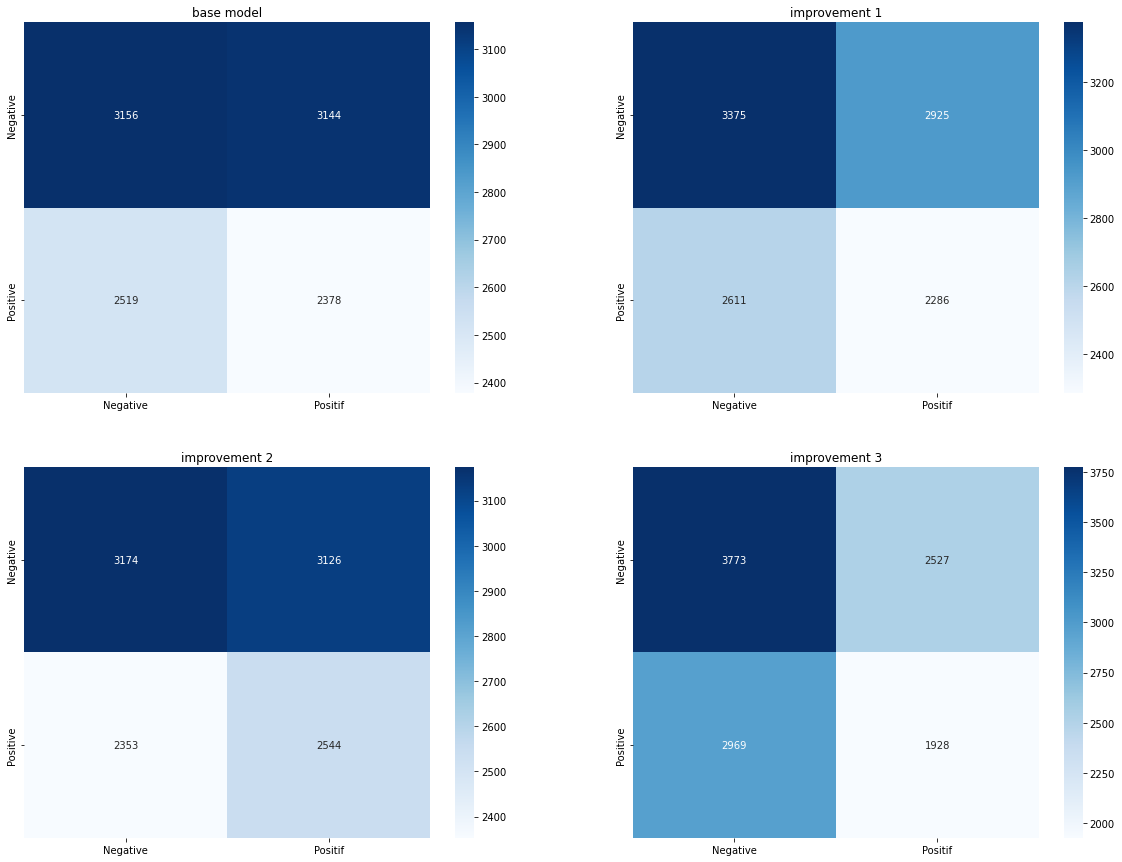

In [231]:
#looping for confusion matrix heatmap
plt.figure(figsize=(20, 15))
for i in range(len(comparison_model.Model)):
  plt.subplot(2, 2, i+1)
  ax = sns.heatmap(df[i], annot=True, cmap='Blues', fmt='g')
  ax.set_xticklabels(['Negative', 'Positif'])
  ax.set_yticklabels(['Negative', 'Positive'])
  plt.title(comparison_model.iloc[i, 0])
plt.show()

Number of wrong prediction:

- Base Model : 5.663
- Improvement 1: 5.586
- Improvement 2: 5.479
- Improvement 3: 5.496



If we look at the confusion matrix, the improvement 2 model has the least number of wrong guesses. I saw the highest number of wrong guesses because. with this sentiment acting on the price of bitcoin, people will buy bitcoin when the price is down (negative) and buy when it is up (positive). If, we guess the sentiment wrong, we can guess the wrong price, which in turn will affect people's decisions to buy or sell bitcoin. When the price is rising, the sentiment indicator shows negative where people will buy it and vice versa.

Best Model : **Model Improvement 2**

# **MODEL SAVING**

In [240]:
import pickle

#saving model
model_imp2.save('model_imp2.h5')

# saving preprocess
with open('tokenizer.pkl','wb') as file:
    pickle.dump(t,file)

# **MODEL INFERENCE**

This model inference is carried out to check whether the functions and models that have been carried out are running if they are entered with new data/input.

In [241]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)


def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

def cleaned(text):
    text = clean_text(text)
    text = word_tokenize(text)
    text = [i for i in text if i not in stopwords]
    text = [word_lemmatizer.lemmatize(word) for word in text]
    return text

def preprocess(text):
    text = pd.Series([text])
    text = text.apply(lambda row: cleaned(row))
    text = t.texts_to_sequences(text)
    text = pad_sequences(text, maxlen = 10, padding = 'post')
    return text

In [242]:
#input
sample = 'Bitcoin (BTC) this morning rapid 5% at the level of 46,631 US dollars'

In [243]:
#preprocess
samples = preprocess(sample)
samples


array([[   2,    3,  695, 2915,  448,   69,  164,    0,    0,    0]])

In [244]:
#predict
y_pred_inf = model_imp2.predict(samples)
y_pred_inf = np.where(y_pred_inf < 0.5, 0 , 1).squeeze()
y_pred_inf

array(0)

The model works well with the new data.

# **CONCLUSION**

From EDA:
- English is the most widely spoken language (the majority)
- In 2017 - 2018 people's tweets related to bitcoin tend to have negative sentiments
- Average word usage is only 16 words
- Average character usage is only 129 characters
- People's tweets about bitcoin tend not to be long sentences like paragraphs.
- People tend to be quick to comment about bitcoin

From Modeling:
- The model is done using layer embedding
- from several models carried out, the highest accuracy is 53%
- The results of training and val also show the model is still overfitting
- Model improvement can solve the problem of overfitting (although it is still considered overfitting) but does not increase accuracy
- This model still needs to be improved, such as:
     - Cleaning, because the model is determined by the incoming data. if the data entered is not good then the results are not good
     - pretrined, Pretraining the model can help to increase the accuracy of the model results.